## Diffusion Maps in Python

 =============================== Example: parametric function ==========================================
 
Problem: Finding the low-dimensional representation of a point cloud in 3-D (Parametric function).

Solution: Diffusion Maps is a spectral technique used to find low-dimensional representation of high-dimensional data.

#### Author: Ketson R. M. dos Santos

Import the required Python toolboxes:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from TestDiffusionMaps import DiffusionMaps
from mpl_toolkits.mplot3d import Axes3D

Get samples from a parametric function with added nois using the following set of equations:

x = (a + b cos(0.8 k t)) cos(t) + noise

y = (a + b cos(0.8 k t)) sin(t) + noise

z = b sin(0.8 k t) + noise

* Sample `n_samples` points from the parametric function with a fixed `random seed` (for example 1).

* The rows of `X` are the samples and the columns correspond to a position in space (x, y, z). 

* In this example the `random seed` is equal to 1 for reproducibility.

In [26]:
n_samples = 2000
np.random.seed(1)

a=6
b=1
k=10
t = np.linspace(0, 2*np.pi, n_samples)

x0 = (a+b*np.cos(0.8*k*t))*(np.cos(t))
y0 = (a+b*np.cos(0.8*k*t))*(np.sin(t))
z0 = b*np.sin(0.8*k*t)

rox = 0.2
roy = 0.2
roz = 0.2
x = x0 + rox*np.random.normal(0,1,len(x0))
y = y0 + roy*np.random.normal(0,1,len(y0))
z = z0 + roz*np.random.normal(0,1,len(z0))

X = np.array([x, y, z]).transpose()

Plot the random samples in `X`.

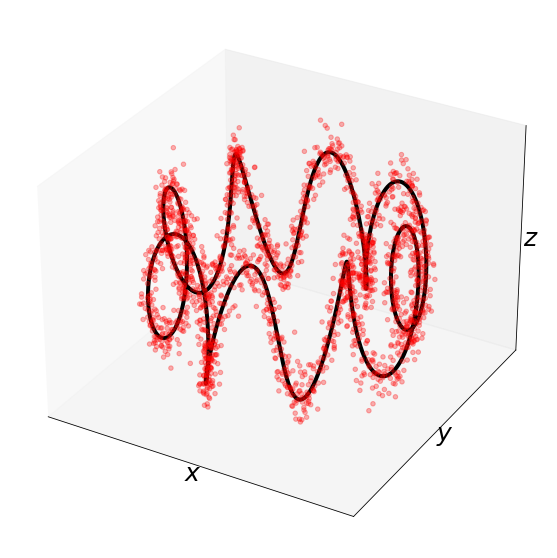

In [27]:
# Plot the Swiss Roll.
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=20, c='r', cmap=plt.cm.brg, alpha=0.3)
ax.plot(x0, y0, z0,'k',label='parametric curve', linewidth=4)
ax.set_xlabel(r'$x$', fontsize=25, rotation=0, labelpad=-15)
ax.set_ylabel(r'$y$', fontsize=25, rotation=0, labelpad=-15)
ax.set_zlabel(r'$z$', fontsize=25, rotation=0, labelpad=-15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax.set_title('Swiss Roll')

plt.show()

Instantiate the class ``DiffusionMaps`` by using the command dfm = DiffusionMaps(), and by making epsilon equal to 1.

In [30]:
# Create an object of DiffusionMaps.
dfm = DiffusionMaps()

# Instantiation.
dfm.fit(X=X, epsilon=0.3)

Plot the relation between the diffusion coordinate 1 $\psi_1$ and the diffusion coordinates from 2 to 5 ($\psi_2$ to $\psi_5$).

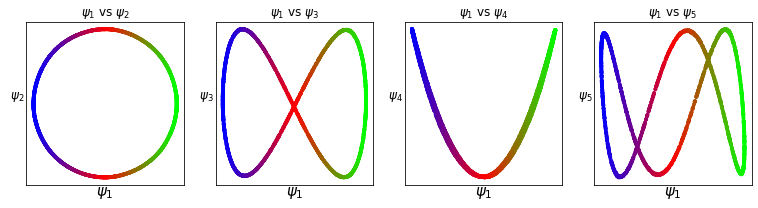

In [31]:
fig = plt.figure(figsize=[13, 3])
# Plot some of the possibles low-dimensional representation of it, where \psi_k is the diffusion coordinate k.
list_of_labels = [r' $\psi_2$', r' $\psi_3$', r' $\psi_4$', r' $\psi_5$']
for i in np.arange(2, 6):
    ax = fig.add_subplot(1, 4, i-1)
    ax.scatter(dfm.diffusion_coordinates[:, 1], dfm.diffusion_coordinates[:, i], c=dfm.diffusion_coordinates[:, 1], cmap=plt.cm.brg, s=8)
    ax.set_xlabel(r'$\psi_1$', fontsize=15, rotation=0, labelpad=0)
    ax.set_ylabel(list_of_labels[i-2], fontsize=12, rotation=0, labelpad=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(r'$\psi_1 $ vs'+list_of_labels[i-2])

plt.show()
